In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

In [33]:
df = pd.read_csv(r"C:\Users\likitha\Downloads\archive (2)\student_performance_dataset.csv")

In [35]:
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [39]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [41]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [43]:
# NORMALISATION

In [45]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Extract numerical data
data = df[numerical_cols]

In [47]:
data

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
0,31,68.267841,86,63
1,16,78.222927,73,50
2,21,87.525096,74,55
3,27,92.076483,99,65
4,37,98.655517,63,70
...,...,...,...,...
703,14,84.658761,78,50
704,35,60.278990,83,62
705,25,98.384969,75,57
706,21,96.148012,84,65


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Min-Max Normalization (Feature Scaling)
# RANGE IS FROM 0-1

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
df_min_max = pd.DataFrame(scaler.fit_transform(data), columns=numerical_cols)


In [55]:
df_min_max

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
0,0.724138,0.364105,0.72,0.481481
1,0.206897,0.563803,0.46,0.000000
2,0.379310,0.750403,0.48,0.185185
3,0.586207,0.841704,0.98,0.555556
4,0.931034,0.973678,0.26,0.740741
...,...,...,...,...
703,0.137931,0.692905,0.56,0.000000
704,0.862069,0.203849,0.66,0.444444
705,0.517241,0.968251,0.50,0.259259
706,0.379310,0.923378,0.68,0.555556


In [57]:
# Z-Score Normalization (Standardization)
# mean = 0 and standard deviation = 1

In [59]:
from scipy.stats import zscore

df_zscore = data.apply(zscore)  # Apply z-score normalization to each column
print(df_zscore.head())


   Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Final_Exam_Score
0              0.548640        -0.713394          0.564773          0.631059
1             -1.142177         0.008352         -0.338471         -1.308910
2             -0.578571         0.682762         -0.268991         -0.562768
3              0.097755         1.012739          1.468017          0.929516
4              1.224966         1.489721         -1.033274          1.675657


In [61]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Apply Z-score normalization
df_zscore = pd.DataFrame(scaler.fit_transform(data), columns=numerical_cols)

In [63]:
df_zscore

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
0,0.548640,-0.713394,0.564773,0.631059
1,-1.142177,0.008352,-0.338471,-1.308910
2,-0.578571,0.682762,-0.268991,-0.562768
3,0.097755,1.012739,1.468017,0.929516
4,1.224966,1.489721,-1.033274,1.675657
...,...,...,...,...
703,-1.367619,0.474952,0.008930,-1.308910
704,0.999524,-1.292588,0.356332,0.481831
705,-0.127687,1.470106,-0.199511,-0.264311
706,-0.578571,1.307926,0.425812,0.929516


In [64]:
# LOG TRANSFORMATION

   Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Final_Exam_Score
0              3.465736         4.237981          4.465908          4.158883
1              2.833213         4.372266          4.304065          3.931826
2              3.091042         4.483286          4.317488          4.025352
3              3.332205         4.533422          4.605170          4.189655
4              3.637586         4.601719          4.158883          4.262680


Text(0.5, 1.0, 'After Log Transformation')

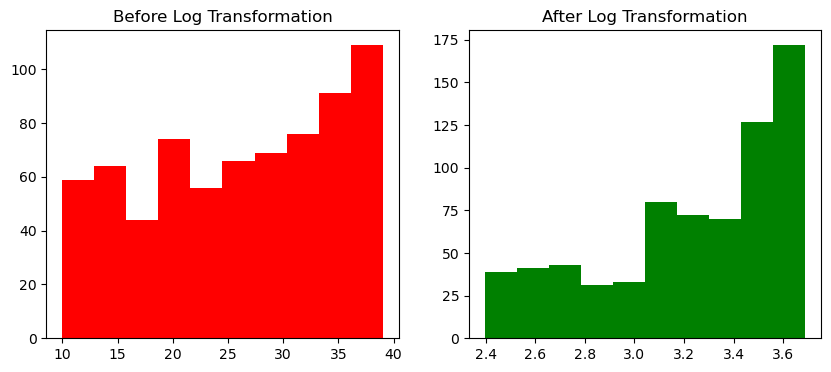

In [65]:
# Apply log transformation (log(1 + X) to handle zeros)
df_log_transformed = data.apply(lambda x: np.log1p(x))

# Display transformed data
print(df_log_transformed.head())

plt.figure(figsize=(10, 4))

# Before Log Transformation
plt.subplot(1, 2, 1)
plt.hist(data[numerical_cols[0]], bins=10, color='red')
plt.title("Before Log Transformation")

# After Log Transformation
plt.subplot(1, 2, 2)
plt.hist(df_log_transformed[numerical_cols[0]], bins=10, color='green')
plt.title("After Log Transformation")

In [66]:
df_log_transformed

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
0,3.465736,4.237981,4.465908,4.158883
1,2.833213,4.372266,4.304065,3.931826
2,3.091042,4.483286,4.317488,4.025352
3,3.332205,4.533422,4.605170,4.189655
4,3.637586,4.601719,4.158883,4.262680
...,...,...,...,...
703,2.708050,4.450372,4.369448,3.931826
704,3.583519,4.115437,4.430817,4.143135
705,3.258097,4.599001,4.330733,4.060443
706,3.091042,4.576236,4.442651,4.189655


In [67]:
# LABEL ENCODING

In [69]:
from sklearn.preprocessing import LabelEncoder

In [71]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [77]:
categorical_cols

Index(['Student_ID', 'Gender', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail'],
      dtype='object')

In [79]:
encoder = LabelEncoder()
df['df_categorical_Gender'] = encoder.fit_transform(df['Gender'])

In [81]:
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,df_categorical_Gender
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass,1
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail,1
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail,0
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass,0
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass,0
...,...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail,1
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass,1
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail,1
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass,0


In [83]:
# One-Hot Encoding (Creates Separate Columns for Each Category)

In [85]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Student_ID'])

In [87]:
df_encoded

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,df_categorical_Gender,...,Student_ID_S491,Student_ID_S492,Student_ID_S493,Student_ID_S494,Student_ID_S495,Student_ID_S496,Student_ID_S497,Student_ID_S498,Student_ID_S499,Student_ID_S500
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass,1,...,False,False,False,False,False,False,False,False,False,False
1,Male,16,78.222927,73,PhD,No,No,50,Fail,1,...,False,False,False,False,False,False,False,False,False,False
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail,0,...,False,False,False,False,False,False,False,False,False,False
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass,0,...,False,False,False,False,False,False,False,False,False,False
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Male,14,84.658761,78,PhD,Yes,No,50,Fail,1,...,False,True,False,False,False,False,False,False,False,False
704,Male,35,60.278990,83,Masters,No,No,62,Pass,1,...,False,False,False,False,False,False,False,False,False,False
705,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail,1,...,False,False,False,False,False,False,False,False,False,False
706,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass,0,...,False,False,False,False,False,False,False,False,False,False


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
 10  df_categorical_Gender       708 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 58.2+ KB


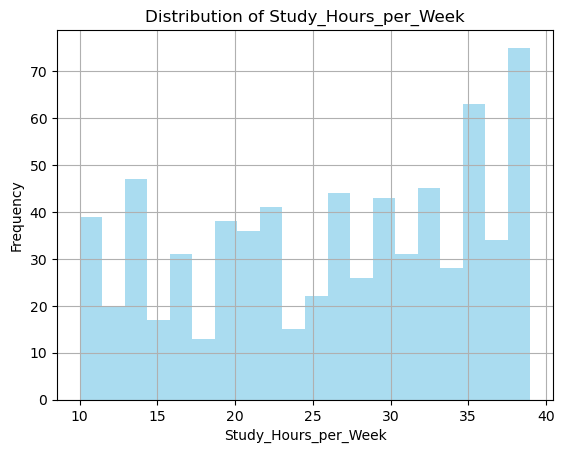

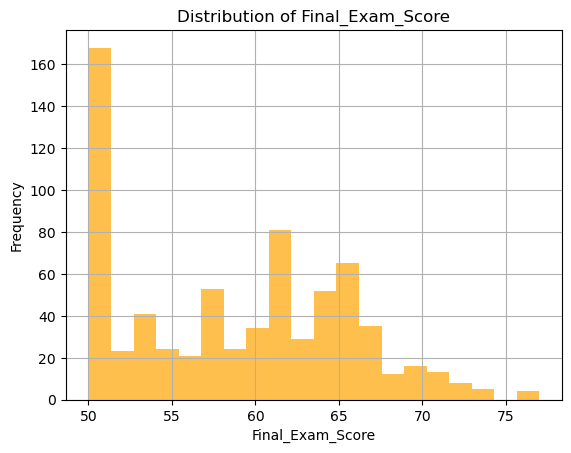

In [91]:
# Histogram for 'Study_Hours_per_Week' and 'Final_Exam_Score'
df['Study_Hours_per_Week'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Study_Hours_per_Week')
plt.xlabel('Study_Hours_per_Week')
plt.ylabel('Frequency')
plt.show()

df['Final_Exam_Score'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Final_Exam_Score')
plt.xlabel('Final_Exam_Score')
plt.ylabel('Frequency')
plt.show()

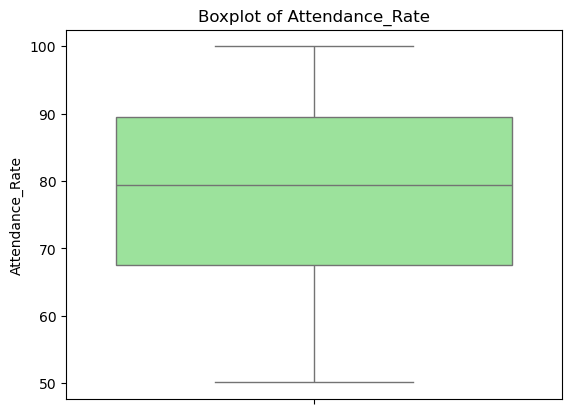

In [92]:
import seaborn as sns 
# Boxplot for 'Attendance_Rate'
# Boxplot - is used to outlier (types - valid and invalid)
sns.boxplot(y=df['Attendance_Rate'], color='lightgreen')
plt.title('Boxplot of Attendance_Rate')
plt.show()

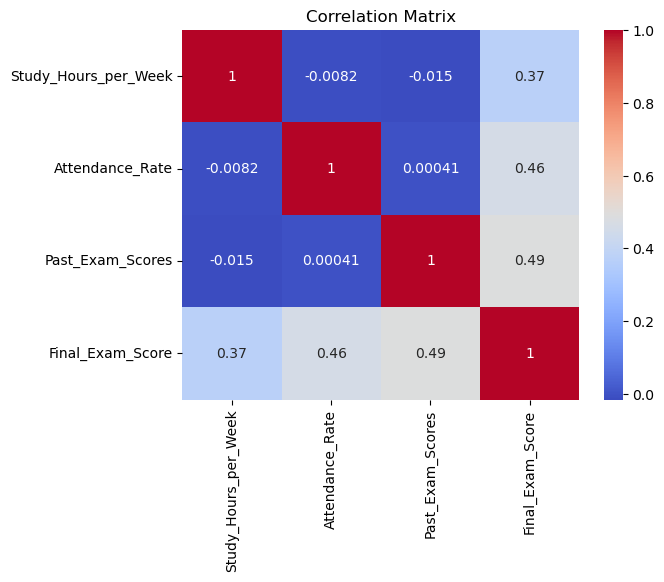

In [94]:
# Correlation analysis for numerical features
# select numerical coloums coz we can't find relation for string values
# columns = [' ', ' ', ' '] 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()     #correlation matrix - corr()

#seaborn is used 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

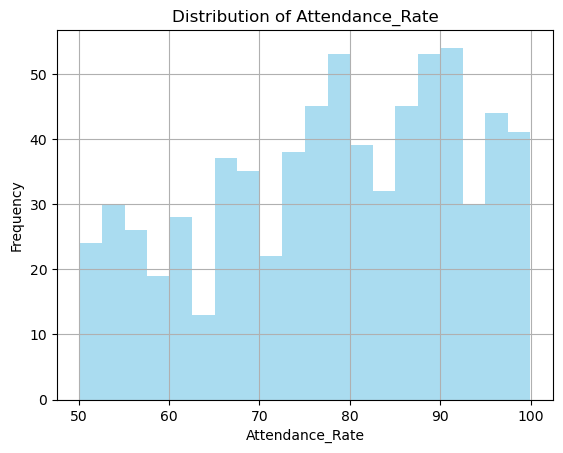

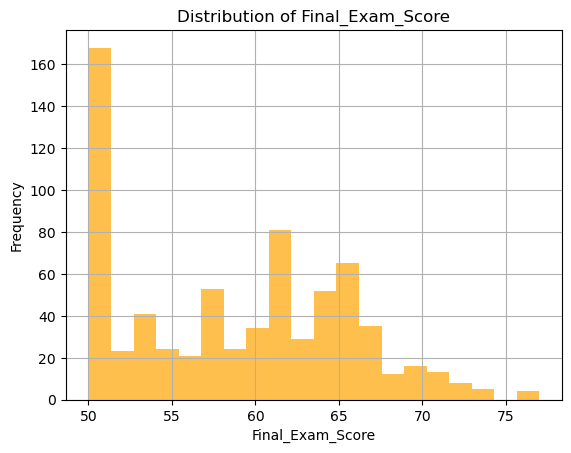

In [97]:
# Histogram for 'Attendance_Rate' and 'Final_Exam_Score'
df['Attendance_Rate'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Attendance_Rate')
plt.xlabel('Attendance_Rate')
plt.ylabel('Frequency')
plt.show()

df['Final_Exam_Score'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Final_Exam_Score')
plt.xlabel('Final_Exam_Score')
plt.ylabel('Frequency')
plt.show()

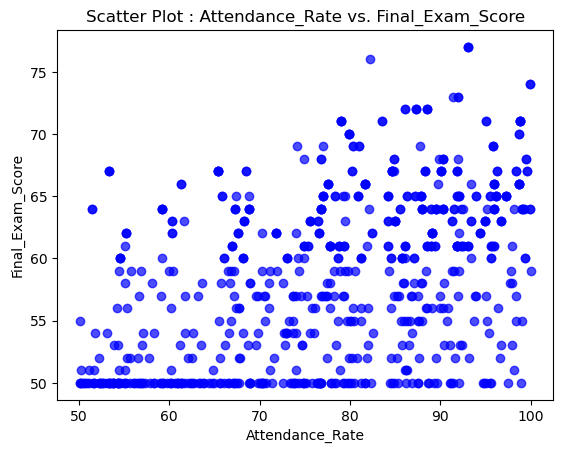

In [98]:
#scatter plot for Attendance_Rate vs. Final_Exam_Score
plt.scatter(df['Attendance_Rate'], df['Final_Exam_Score'], color='blue', alpha = 0.7)
plt.title("Scatter Plot : Attendance_Rate vs. Final_Exam_Score")
plt.xlabel("Attendance_Rate")
plt.ylabel("Final_Exam_Score")
plt.show()

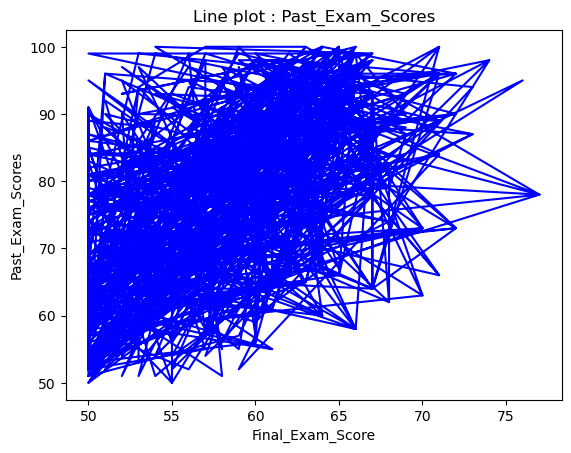

In [101]:
# line plot for Attendance_Rate by passenger index
plt.plot(df['Final_Exam_Score'], df['Past_Exam_Scores'], color = 'blue')
plt.title("Line plot : Past_Exam_Scores")
plt.xlabel('Final_Exam_Score')
plt.ylabel('Past_Exam_Scores')
plt.show()